In [1]:
import sys
sys.dont_write_bytecode = True
import pandas as pd
import pickle
import bz2
import tensorflow as tf
import random
import matplotlib.pyplot as plt

2023-10-27 14:56:21.639796: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 14:56:21.639842: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 14:56:21.649628: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 14:56:22.593765: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using TensorFlow backend


In [5]:
import os 
os.chdir('/mnt/c/Users/ADMIN/github/ObsProject/')

/mnt/c/Users/ADMIN/github/ObsProject/docker_agent_logger/app/src


In [ ]:
from AI import *

In [ ]:
# df = pd.read_csv("docker_agent_logger/app/data/OpenStack_2k.log_structured.csv")

# labels = tf.constant(df["EventId"].apply(lambda x: int(x[1:])-1))

# df = df.drop(["LineId","EventId","EventTemplate"],axis=1)

# df["Pid"] = df["Pid"].apply(str)

# logs = []

# for i,r in df.iterrows():
#     logs.append(" ".join(r))



vocab_size = 5000
max_len=256
epochs=32
chkpt = "docker_agent_logger/app/classifier/"

raw_ds = ( #.filter(lambda x: tf.strings.length(x) > MIN_TRAINING_SEQ_LEN)
    tf.data.TextLineDataset("docker_agent_logger/app/data/HDFS_v2/node_logs/hadoop-hdfs-datanode-mesos-32.log")
    .batch(32)
    .shuffle(buffer_size=256)
)

# vocab = keras_nlp.tokenizers.compute_word_piece_vocabulary(
#             raw_ds,
#             vocabulary_size=vocab_size,
#             reserved_tokens=["[PAD]", "[UNK]", "[BOS]","[EOS]"],
#         )

# with open("docker_agent_logger/app/logs_tokenizer/vocab.pkl","wb") as f:
#     pickle.dump(vocab,f)

with open("docker_agent_logger/app/logs_tokenizer/vocab.pkl","rb") as f:
    vocab = pickle.load(f)

tokenizer = Tokenizer(vocab=vocab,max_len=max_len)


ds = raw_ds.map(tokenizer.preprocess, num_parallel_calls=tf.data.AUTOTUNE).prefetch(
    tf.data.AUTOTUNE
)

# val_split = 0.2
# ds_size = ds.cardinality().numpy()

# train_size = int((1-val_split) * ds_size)
# val_size = int(val_split * ds_size)

# train_ds = ds.take(train_size)
# val_ds = ds.skip(train_size).take(val_size)



model = Model(vocab_size = vocab_size,latent_dim=256,embedding_dim=128,max_len = max_len)

model.vae.load_model(chkpt=chkpt+str(0))

# model.train_model(ds,epochs=epochs,chkpt=chkpt)



# def plot_label_clusters(vae, data):
#     # display a 2D plot of the digit classes in the latent space
#     z_mean, _, _ = vae.encoder.predict(data)
#     plt.figure(figsize=(12, 10))
#     plt.scatter(z_mean[:, 0], z_mean[:, 1])
#     plt.colorbar()
#     plt.xlabel("z[0]")
#     plt.ylabel("z[1]")
#     plt.savefig("cluster.png")

# plot_label_clusters(model.vae, ds)

z = tf.random.normal(shape=(1, 256))
# encode_token = ds.take(1).as_numpy_iterator().next()

# print(tokenizer.decode(encode_token))

tokens = model.vae.decode(z)

print(tokenizer.decode(tokens))




Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 input_embedding (TokenAndP  (None, 256, 128)             672768    ['input_word_ids[0][0]']      
 ositionEmbedding)                                                                                
                                                                                                  
 encoding (TransformerEncod  (None, 256, 128)             132480    ['input_embedding[0][0]']     
 er)                                                                                        

InvalidArgumentError: {{function_node __wrapped__Multinomial_device_/job:localhost/replica:0/task:0/device:GPU:0}} logits should be a matrix, got shape [1,256,5000] [Op:Multinomial] name: 

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 input_embedding (TokenAndP  (None, 256, 128)             672768    ['input_word_ids[0][0]']      
 ositionEmbedding)                                                                                
                                                                                                  
 encoding (TransformerEncod  (None, 256, 128)             132480    ['input_embedding[0][0]']     
 er)                                                                                        

2023-10-28 18:35:45.057583: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 2794020702318296051
2023-10-28 18:35:45.057663: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16055326994234470568


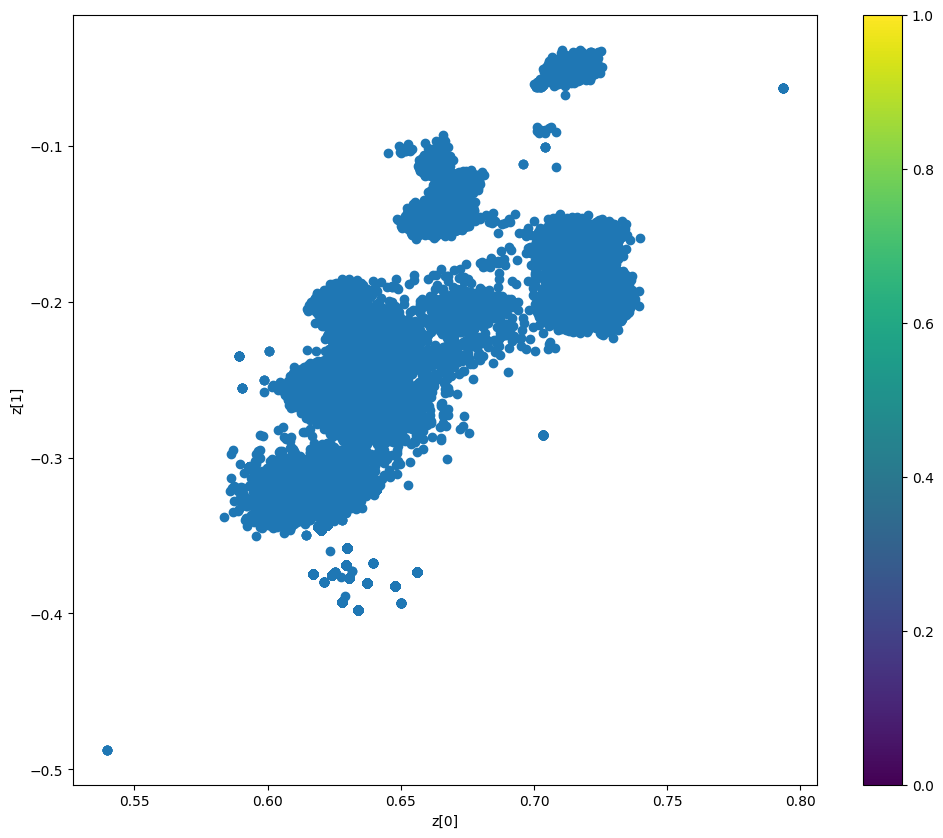

6051/6051 [==============================] - 106s 17ms/step


2023-10-28 18:37:39.298990: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 2794020702318296051
2023-10-28 18:37:39.299189: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16055326994234470568


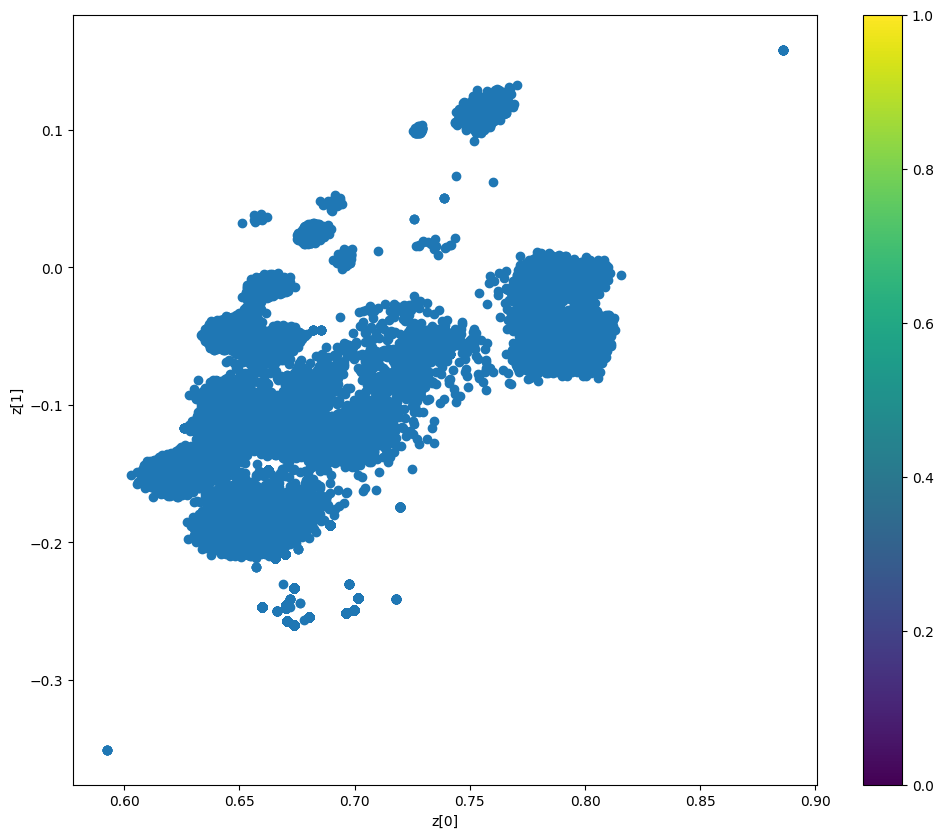

    397/Unknown - 5s 12ms/step

KeyboardInterrupt: 

In [13]:
def plot_label_clusters(vae, name,data):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1])
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig("./results/"+name+".png")
    plt.show()

model = Model(vocab_size = vocab_size,latent_dim=256,embedding_dim=128,max_len = max_len)


for i in range(32):
    model.vae.load_model(chkpt=chkpt+str(i))

    plot_label_clusters(model.vae, "cluster"+str(i),ds)